In [1]:
import iris
import numpy as np
import matplotlib.pyplot as plt
import os
import cmocean
import warnings
from iris.coord_categorisation import add_month

In [3]:
os.chdir("/home/548/eh6215/Desktop/python/BARPA_evaluation/emma/lib")
from plotting_functions import bias_plots

In [24]:
path = "/short/tp28/eh6215/daily/"
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    opt1 = iris.load(path+"cg282_fb_convect/*.nc","prcp")
    iris.util.equalise_attributes(opt1)
    opt1=opt1.concatenate_cube()
    add_month(opt1,'month','time')
    opt2 = iris.load(path+"cg282_radeasyaerosol/*.nc","prcp")
    iris.util.equalise_attributes(opt2)
    opt2=opt2.concatenate_cube()
    opt3 = iris.load(path+"cg282_noeasyaerosol/*.nc","prcp")
    iris.util.equalise_attributes(opt3)
    opt3=opt3.concatenate_cube()
    

In [28]:
#opt1d = opt1.data
#opt2d = opt2.data
#opt3d = opt3.data

add_month(opt1,'time','month')
add_month(opt2,'time','month')
add_month(opt3,'time','month')

In [5]:
data = {'opt1':{"precip":opt1},'opt2':{"precip":opt2},'opt3':{"precip":opt3}}

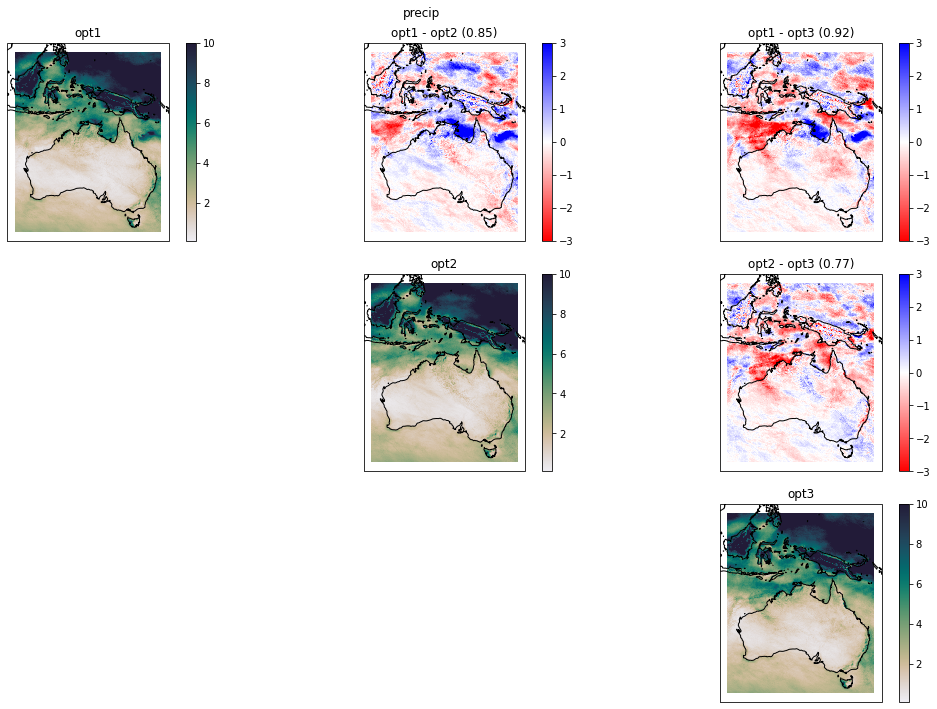

In [23]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    plt.figure(figsize=(15,10))
    bias_plots(data,'precip',False,['opt1','opt2','opt3'],0.1,10,3,cmocean.cm.rain,'bwr_r','mm/day',offset=0)#,lognorm=True)
    plt.tight_layout()

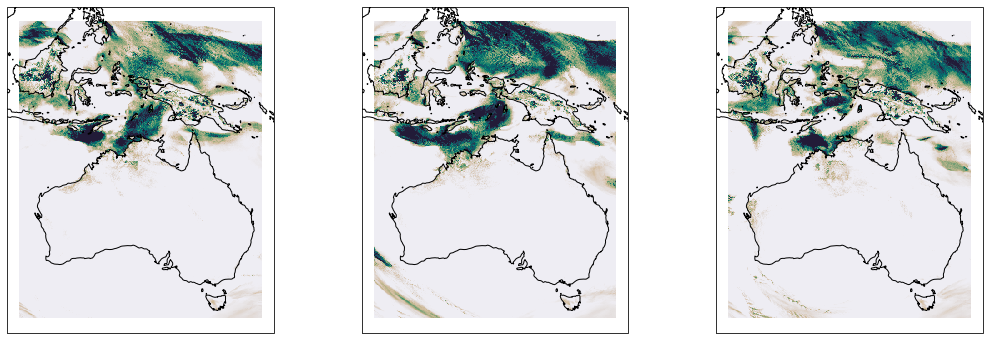

interactive(children=(IntSlider(value=0, description='i', max=1), Output()), _dom_classes=('widget-interact',)…

<function __main__.update(i=0)>

In [15]:

import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

import ipywidgets
from matplotlib.animation import FuncAnimation
import cartopy.crs as ccrs
import iris.plot as iplt
from matplotlib.colors import LogNorm
fig, ax = plt.subplots(1,3,figsize=(18,6),subplot_kw={"projection":ccrs.PlateCarree()})
p1 = iplt.pcolormesh(opt1[0],axes=ax[0],cmap=cmocean.cm.rain,vmin=1,vmax=50)#norm=LogNorm())
p2 = iplt.pcolormesh(opt2[0],axes=ax[1],cmap=cmocean.cm.rain,vmin=1,vmax=50)#norm=LogNorm())
p3 = iplt.pcolormesh(opt3[0],axes=ax[2],cmap=cmocean.cm.rain,vmin=1,vmax=50)#,norm=LogNorm())
ax[0].coastlines()
ax[1].coastlines()
ax[2].coastlines()

def update(i=0):
    p1.set_array( opt1d[i].flatten())
    p2.set_array( opt2d[i].flatten())
    p3.set_array( opt3d[i].flatten())
    fig.canvas.draw()
    
ipywidgets.interact(update,x=30)

IndexError: index 100 is out of bounds for axis 0 with size 30

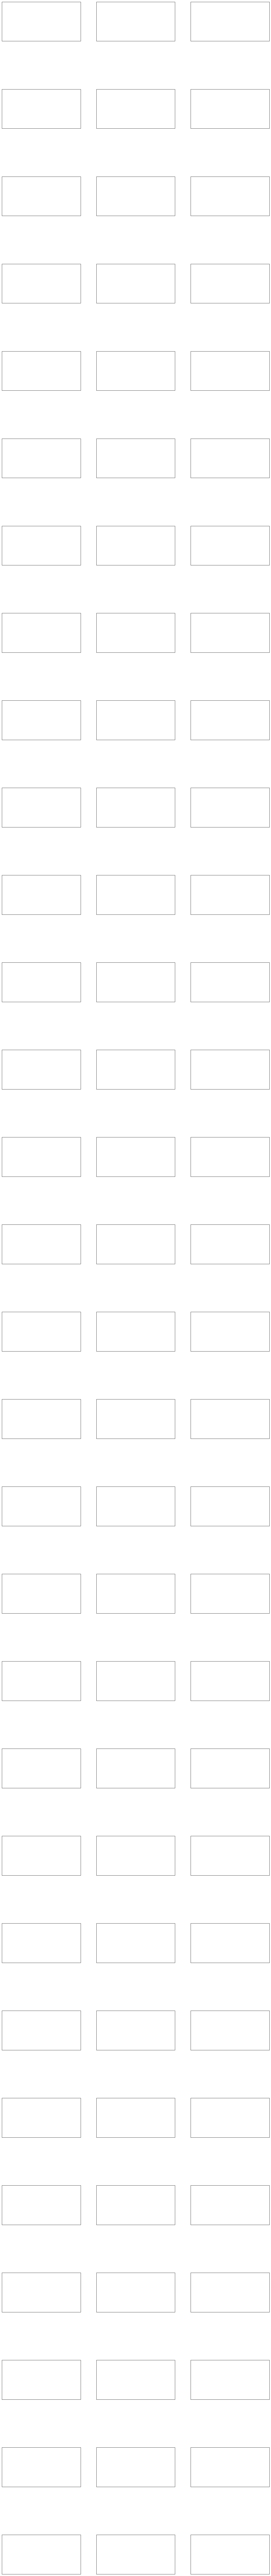

In [41]:
fig, ax = plt.subplots(30,3,figsize=(18,180),subplot_kw={"projection":ccrs.PlateCarree()})
for i in range(100,130):
    for j,opt in enumerate([opt1,opt2,opt3]):
        iplt.pcolormesh(opt[i],axes=ax[i,j],cmap=cmocean.cm.rain,vmin=1,vmax=50)
        ax[i,j].coastlines()

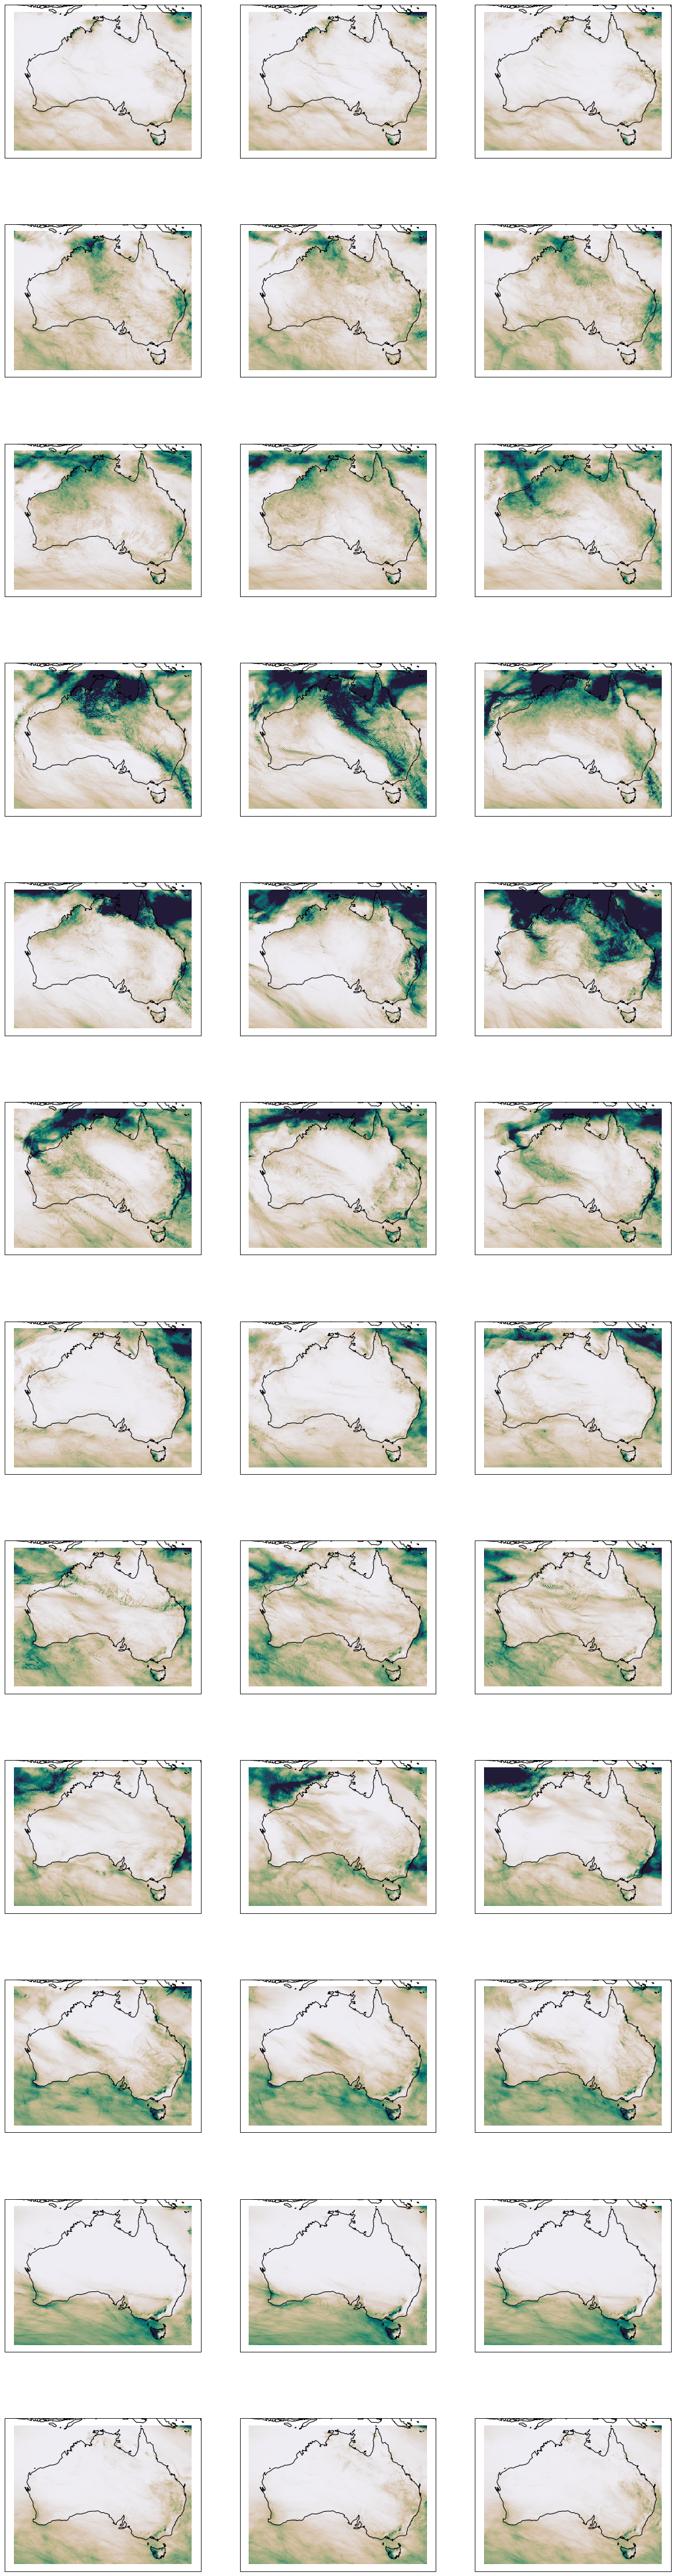

In [40]:


fig, ax = plt.subplots(12,3,figsize=(18,72),subplot_kw={"projection":ccrs.PlateCarree()})
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for j,opt in enumerate([opt1,opt2,opt3]):
        mon = opt.aggregated_by('month',iris.analysis.MEAN).extract(iris.Constraint(latitude=lambda y: y<-10))
        for i in range(12):
            iplt.pcolormesh(mon[i],axes=ax[i-1,j],cmap=cmocean.cm.rain,vmin=0,vmax=12)
            ax[i-1,j].coastlines()